In [3]:
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image 
import cv2

## EECS 531 Assignment 1

Due Saturday Feb 15 before midnight. 120 points total.

### Submitting assignments to Canvas

- You can use this notebook as a starting point for completing the assignment.
- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If you decide not to a notebook, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS531-A1-yourcaseid.ipynb`
  - `EECS531-A1-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS531-A1-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS531-A1-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Some of exercises below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the readings and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

Many of these exercises also involve a wide range of choice in terms of how you complete them.  Since each exercise is only worth 5 pts, in terms of grading I'm mainly looking for whether you demonstrate understanding of the concepts. Concise answers are sufficient if you demonstrate clear understanding.  If you find yourself writing very lengthy answers and going deeper and deeper into a question, consider moving that work to the exploration component.

## Krashagi and kxg360 here

### Exercise 1. Convolution (15 pts)

1.1 (5 pts) Using the discrete definition, show that convolution is a linear operation, i.e.

$$
(f + g) * c = f*c + g*c \quad \textrm{and} \quad (\lambda f)*c = \lambda(f*c)
$$

1.2. (5 pts) Show that the convolution of a separable two-dimensional filter kernel $\mathbf{K} = \mathbf{u}\mathbf{v^T}$ is equivalent to a 1-D horizontal convolution with kernel $\mathbf{h}$ followed by a 1-D vertical convolution with kernel $\mathbf{v}$.

1.3. (5 pts) Describe the advantages and limitations of such an approach.

1.1 (5 pts) Using the discrete definition, show that convolution is a linear operation, i.e.

$$
(f + g) * c = f*c + g*c \quad \textrm{and} 
$$

$$f(n) * c(n) = \sum_{k=-\infty}^{\infty} f(k).c(n-k) $$

$$ [f(n) + g(n)] * c(n) = \sum_{n=-\infty}^{\infty} [f(k) + g(k)].c(n-k) $$

$$                      = \sum_{n=-\infty}^{\infty} f(k1).c(n-k1)   + \sum_{n=-\infty}^{\infty} g(k2).c(n-k2) $$

$$                      = f(n) * c(n)   +  g(n) * c(n) $$



$$ (\lambda f)*c = \lambda(f*c) $$

$$ (\lambda f(n))*c(n) =  \sum_{n=-\infty}^{\infty} \lambda.f(k).c(n-k) $$

$$                     =  \lambda. \sum_{n=-\infty}^{\infty} f(k).c(n-k) $$

$$                     =  \lambda.  ( f(n))*c(n) $$










1.2. (5 pts) Show that the convolution of a separable two-dimensional filter kernel  𝐊=𝐮𝐯𝐓  is equivalent to a 1-D horizontal convolution with kernel  𝐡  followed by a 1-D vertical convolution with kernel  𝐯 .


Consider sobel filter with the matrix as follows :
 $$ K = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix} 
$$

which can be separated as  $$
v = \begin{bmatrix}
 1 \\
 2 \\
 1 \\
\end{bmatrix}  \quad
{and} \quad
h = \begin{bmatrix}
 -1 & 0 & 1 \\ 
\end{bmatrix}
$$

if pixel value of say 2 is convolved with the sobel matrix,
$$2 *  \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}  = -2 + 2 - 4 + 4 - 2 + 2 = 0 $$
which is equal to multiplying 2 with the horizontal matrix and the vertical matrix
$$ 2 .\begin{bmatrix}
 -1 & 0 & 1 \\ 
\end{bmatrix}. \begin{bmatrix}
 1 \\
 2 \\
 1 \\
\end{bmatrix}   = 0 $$



1.3. (5 pts) Describe the advantages and limitations of such an approach.


Advantages :
    The process of performing a convolution requires $K^2$(multiply-add) operations per pixel,
    where K is the size (width or height) of the convolution kernel.
    When the kernel is separable this operation can be significantly sped up by first performing a
    one-dimensional horizontal convolution followed by a one-dimensional vertical convolution
    (which requires a total of $2K$ operations per pixel). The main advantage of separable filtering is quite clear;
    much reduced computational cost.
    Another advantage is that since there are less number of machine cycles involved to produce the
    same output compared to the raw 2D convolution,
    it's less prone to numerical issues and likely to produce more accurate results.


Disadvantage :
         A disadvantage of separation is that it requires an extra ram memory to store the intermediate image, which can be concern in certain applications.

### Exercise 2.  Linear Filtering (20 pts)

Here you will write functions to implement 2D filtering.  Refer to Szeliski chapter 3 and more specifically section 3.2.  For this exercise, you should implement the filter functions "by hand", i.e. do not use a library.  Your answers should be explanatory.



2.1 (5 pts) Write a function that implements linear filtering (i.e. equation 3.12 or 3.14 in Szeliski).  Write a short "doc string" that explains your function and its arguments.  Also explain how you handled boundaries.



2.2 (5 pts) Demonstrate the correctness of your implementation.

2.3 (5 pts) Define blurring filters of different sizes and apply them to images.  Explain how the kernel structure achives the blurring operation, and illustrate it by showing original and filtered images side by side.

2.4 (5 pts) Define a different filter kernel (besides blurring).  Demonstrate it by apply it to images and explain how its structure achieves the intended function.  

In [44]:
# 2.1 (5 pts) Write a function that implements linear filtering (i.e. equation 3.12 or 3.14 in Szeliski).
# Write a short "doc string" that explains your function and its arguments. 
# Also explain how you handled boundaries.


#  function linear filter : Input is a gray scale image and a filter kernel
# boundaries are handled by padding the edge pixels around the original picture
def linear_filter(gray, kernel):
# determining the dimensions of image and kernel
    (iH, iW) = gray.shape[:2]
    (kH, kW) = kernel.shape[:2]

#bordering the original image by repeating the border edges on all sides
    pad = (kW - 1) // 2 # pad = 1
    gray = cv2.copyMakeBorder(gray, pad, pad, pad, pad,
                           cv2.BORDER_REPLICATE)
    
# creating an output image with the same dimensions as input image
    output = np.zeros((iH, iW), dtype="float32")

# looping through the height dimension after the top padding to the bottom padding edge
    for y in np.arange(pad, iH + pad):
    # looping through the width dimension after the left padding to the right padding edge
        for x in np.arange(pad, iW + pad):
        # locating the region of interest where actual convolution needs to be done
            roi = gray[y - pad:y + pad + 1, x - pad:x + pad + 1]
        # convolution
            k = (roi * kernel).sum()
        # appending to output
            output[y - pad, x - pad] = k

    #rescale_intensity to ensure pixels are in between 0,255 range
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")


    return output
#     cv2.imshow("output", output)
#     cv2.imwrite("C:/MyImage.jpg", output);
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()










In [45]:
#2.2 (5 pts) Demonstrate the correctness of your implementation.
# demonstrated the correctness of implementation by giving the output from a library function below

# defining a blur kernel src: http://setosa.io/ev/image-kernels/
kernel = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125],[0.0625, 0.125, 0.0625]]) # gaussian blur
image = cv2.imread('babys.jpg')
# converting colored image to grayscale because we need a matrix of only 2 dimensions
#     img = cv2.imread('/home/img/python.png') 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# calling  mylinearfilter
output =linear_filter(gray,kernel)  
cv2.imshow("output", output)
cv2.waitKey(0)
cv2.destroyAllWindows()




                                                                      


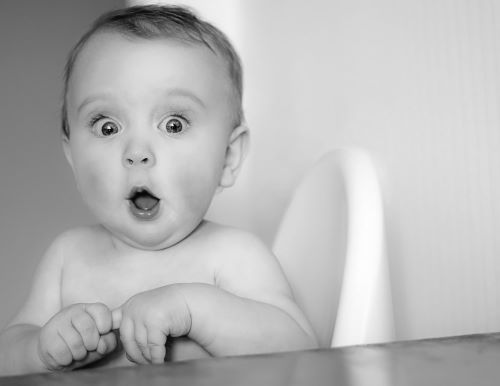

In [6]:

Image.fromarray(gray)
#original gray image


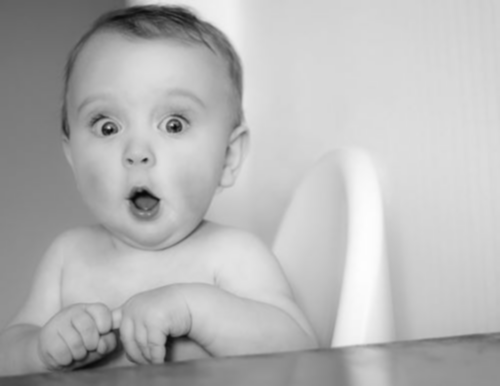

In [23]:
Image.fromarray(output)
# my filtered image

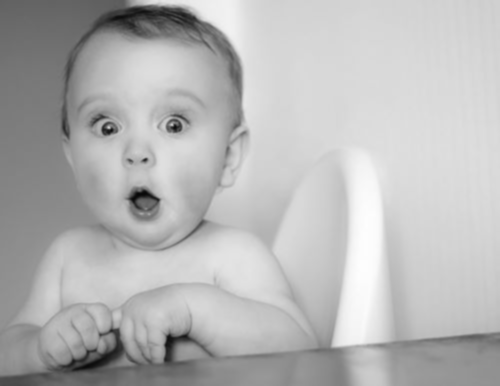

In [7]:
Image.fromarray(np.uint8(cv2.filter2D(np.array(gray), -1, kernel)))
# cv2.filter2d library function output given to give a comparision between library output and my filter output
# providing the same kernel


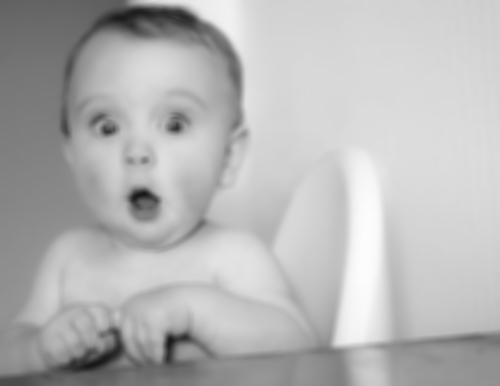

In [14]:
# 2.3 (5 pts) Define blurring filters of different sizes
# and apply them to images.
# Explain how the kernel structure achives the blurring operation,
# and illustrate it by showing original and filtered images side by side.
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
image = cv2.imread('babys.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# calling  mylinearfilter
smallBlur =linear_filter(gray,smallBlur) 
Image.fromarray(smallBlur)


# from the two blur kernels applied here,
# one can conclude that by increasing the size of the kernel,
# the individual values of the kernel matrix reduces and therefore the convolution
# sum is way smaller than what it was before for the central pixel

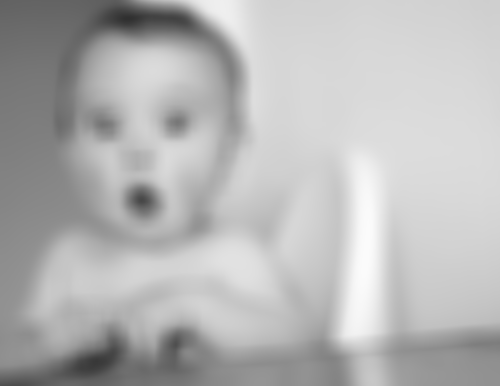

In [16]:
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
image = cv2.imread('babys.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calling  mylinearfilter
largeBlur =linear_filter(gray,largeBlur) 
Image.fromarray(largeBlur)

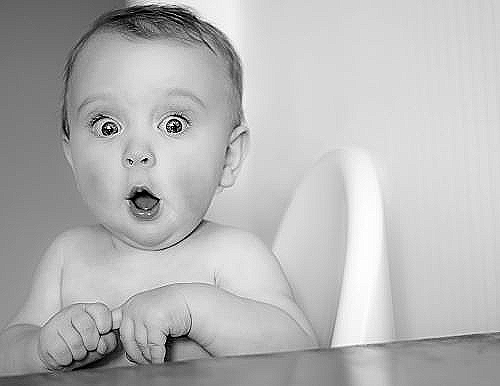

In [7]:
#2.4 (5 pts) Define a different filter kernel (besides blurring). 
# Demonstrate it by apply it to images and explain how its structure achieves the intended function.  

# the filter applied is sharpen filter and it sharpens the image.
# the structure of the kernel is such that it resembles a sharp nib.
# The central pixrl is the highest while its adjacent pixels are very low.
# its as though when and image passes through the kernel the center value 
# of the image is enhanced and comes into focus



import numpy as np
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image 
import cv2
kernel2 = np.array([[0, -1, 0], [-1, 5, -1],[0, -1, 0]]) #sharpen
image = cv2.imread('babys.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calling  mylinearfilter
sharpen =linear_filter(gray,kernel2) 

Image.fromarray(sharpen)

# cv2.imshow("sharpen", sharpen)
# kernel3 = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]]) # top sobel
# kernel4 = np.array([[-2, -1, 0],[-1,1,1],[0, 1, 2]])# emboss
# top_sobel =linear_filter(gray,kernel3) 
# cv2.imshow("top_sobel", top_sobel)
# Image.fromarray(top_sobel)
# emboss =linear_filter(gray,kernel4) 
# cv2.imshow("emboss", emboss)
# Image.fromarray(emboss)


# cv2.waitKey(0)
# cv2.destroyAllWindows()



### Exercise 3.  Non-linear Filtering (15 pts)

In this exercise you should also implement the filter by hand.  You should be able to modify your code from the previous exercise.

3.1 (5 pts) Define a function that implements some type of *non-linear* filtering.  

3.2 (5 pts) Show why this cannot be implemented by a linear filter.

3.3 (5 pts) Demonstrate this filter by applying it to images that are appropriate for illustrating its function.

In [9]:
# 3.1 (5 pts) Define a function that implements some type of *non-linear* filtering. 

# non-linear filter created is the median filter
def non_linear_filter(gray, kernel_size):
    
# determining the dimensions of image
    (iH, iW) = gray.shape[:2]
#     (kH, kW) = kernel.shape[:2]

#bordering the original image by repeating the border edges on all sides
    pad =  1
    gray = cv2.copyMakeBorder(gray, pad, pad, pad, pad,
                           cv2.BORDER_REPLICATE)
# creating an output image with the same dimensions as input image
    output = np.zeros((iH, iW), dtype="float32")

# looping through the height dimension after the top padding to the bottom padding edge
    for y in np.arange(pad, iH + pad):
    # looping through the width dimension after the left padding to the right padding edge
        for x in np.arange(pad, iW + pad):
        # locating the region of interest where actual convolution needs to be done
            roi = gray[y - pad:y + pad + 1 + kernel_size[0], x - pad:x + pad + 1 ++ kernel_size[0]]
        # obtaining the median
#             k = (roi * kernel).median()
            k = np.median(roi)
        # appending to output
            output[y - pad, x - pad] = k


    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")


    # print(kernel)
    return output
#     cv2.imshow("output", output)
#     cv2.imwrite("C:/MyImage.jpg", output);
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()












3.2 (5 pts) Show why this cannot be implemented by a linear filter.

For this case in particular, salt and pepper noise, the section of the image might look like this:
$$ \quad \begin{bmatrix}
255 &  2 & 2\\
2 & 3 & 4 \\
0 & 2 & 3
\end{bmatrix}  \quad
$$
if we were to do linear filtering of any kind the value for the central pixel would be some kind of average of all the neighbouring pixels and as a result the noise 255, being the greatest will get an expression.
We are interested in suppressing the noise and therefore this methodology will not work.


In [10]:
# 3.3 (5 pts) Demonstrate this filter by applying it to images that are appropriate for illustrating its function.

# kernel = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125],[0.0625, 0.125, 0.0625]]) # gaussian blur
Oimage = cv2.imread('saltPepper.png')
# converting colored image to grayscale because we need a matrix of only 2 dimensions
#     img = cv2.imread('/home/img/python.png') 

gray2 = cv2.cvtColor(Oimage, cv2.COLOR_BGR2GRAY)
# calling  mylinearfilter
nloutput = non_linear_filter(gray2,[3,3])  
cv2.imshow("output", nloutput)
cv2.waitKey(0)
cv2.destroyAllWindows()


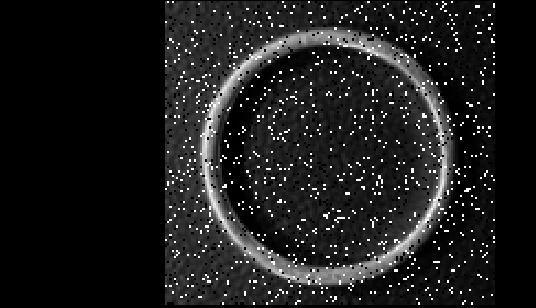

In [12]:
Image.fromarray(gray2)

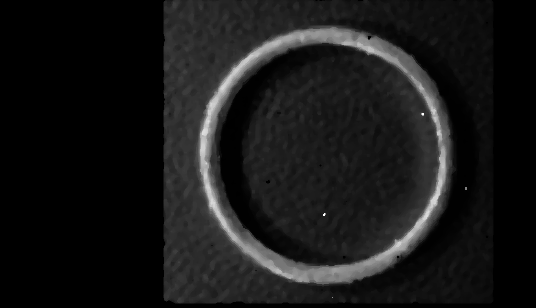

In [14]:
Image.fromarray(nloutput)

### Exercise 4. Edge Detection (30 pts)

In this exercise, you will need to choose an image processing libary that provides edge detection (see Szeliski chapter 4).  It should provide different types of edge detection and allow for control over smoothing.

4.1 (5 pts) Explain how you chose your library and what options you considered (briefly) and demonstrate the interface on two different types of edge detection algorithms.

4.2 (5 pts) Select a few noise-free images and show how edge detection can work at some scales but not at others.  Explain what is happening in terms of the edge-detection algorithm.

4.3 (5 pts) Add varying amounts of noise to an image and show how edge detection degrades.  Again explain what is happening in terms of the algorithm.

4.4 (5 pts) Now use these same noisy images but use smoothing to improve the edge detection and compare the results to the original noise-free image.

4.5 (5 pts) Select images to illustrate how an edge detection can detect numerous types of boundaries that correspond to distinct types of structure in the real world.

4.6 (5 pts) Now select images to illustrate different ways in which edge detection can fail, in the sense that the boundary is clear visible to us, but isn't detectable by the algorithm.

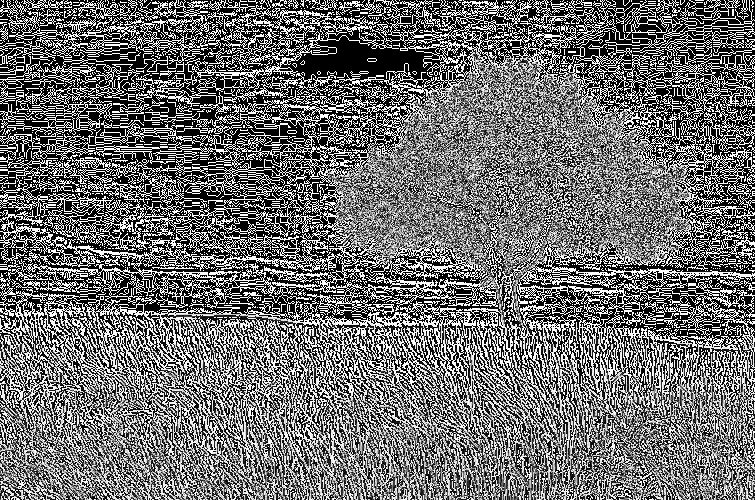

In [42]:
# 4.1 (5 pts) Explain how you chose your library and
# what options you considered (briefly) and
# demonstrate the interface on two different types of edge detection algorithms.

# The library i chose in furthur problems here is the opencv library
# i chose this because i can work on this knowing python, it can interface with matlab.
# it is widely used library for computer vision with many functions

# in the furthur problems i'm going to use the canny filter as it gives a threshold range in which 
# i can detect edges, it also provides thin edges

from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image 
import cv2

img = cv2.imread("edgePicBank/tree.jpg", cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img, cv2.CV_64F)    
       
# cv2.imshow("sobelx", sobelx)    
Image.fromarray(np.uint8(laplacian))

# laplacian provides all the details but it has a lot of noise
# and it can clearly notice if there is a space in the pics





    
# Image.fromarray(img)



# # sobel filter x 
# sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Will do edge detection in the x direction
# # sobel filter y
# sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1) # will do edge detection in the y direction      
# #canny filter
# canny = cv2.Canny(img,20,200)     
# laplacian filter




# # gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # edges = cv2.Canny(gray2,100,200)
# cv2.imshow("original",img)
# # cv2.imshow("sobely", sobely)
# # cv2.imshow("laplacian",laplacian)
# cv2.imshow("canny",canny)


 
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows() # destroys the window showing image


    

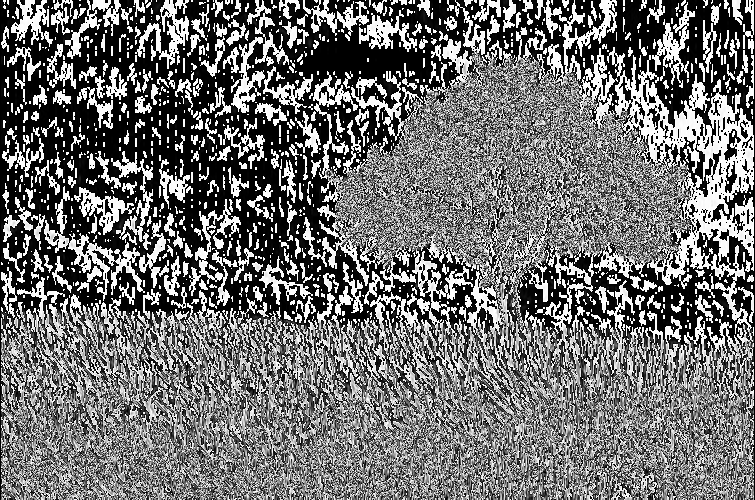

In [39]:
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image 
import cv2

img = cv2.imread("edgePicBank/tree.jpg", cv2.IMREAD_GRAYSCALE)
# sobel filter x
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0) # will do edge detection in the y direction      

Image.fromarray(np.uint8(sobelx))

# catches vertical edges


    


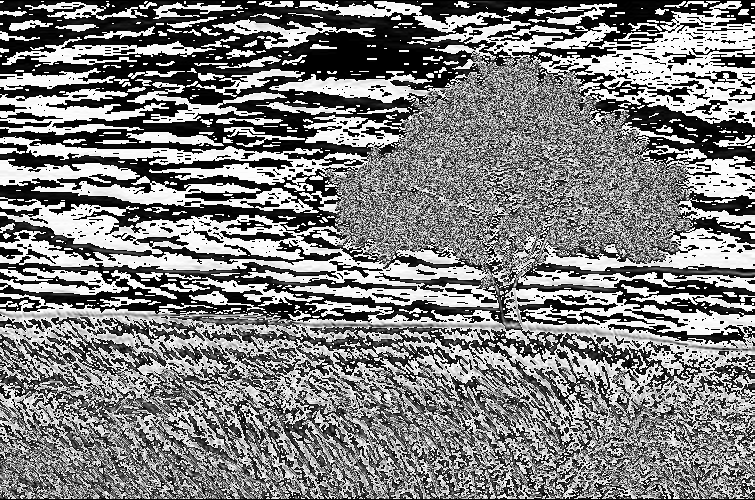

In [38]:
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image 
import cv2

img = cv2.imread("edgePicBank/tree.jpg", cv2.IMREAD_GRAYSCALE)
# sobel filter y
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1) # will do edge detection in the y direction      
Image.fromarray(np.uint8(sobely))

# catches horizontal edges



In [ ]:
# 4.1 (5 pts) Explain how you chose your library and
# what options you considered (briefly) and
# demonstrate the interface on two different types of edge detection algorithms.

# The library i chose in furthur problems here is the opencv library
# i chose this because i can work on this knowing python, it can interface with matlab.
# it is widely used library for computer vision with many functions

# in the furthur problems i'm going to use the canny filter as it gives a threshold range in which 
# i can detect edges, it also provides thin edges

import cv2
import numpy as np
def demo_multi_filters(img, fltr):
    if(fltr == "sobelx"):
        # sobel filter x 
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Will do edge detection in the x direction
    elif(fltr == "sobely"):
        # sobel filter y
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 0, 1) # will do edge detection in the y direction      
    elif(fltr == "laplacian"):
        # laplacian filter
        edgedetectedImage = cv2.Laplacian(img, cv2.CV_64F)
    else:       
        #canny filter
        edgedetectedImage = cv2.Canny(img,20,200) 
    cv2.imshow("edgedetectedImage", edgedetectedImage)    
    Image.fromarray(edgedetectedImage)
    return edgedetectedImage
# img = cv2.imread("edgePicBank/tree.jpg", cv2.IMREAD_GRAYSCALE)
# Image.fromarray(img)








# # gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # edges = cv2.Canny(gray2,100,200)
# cv2.imshow("original",img)
# # cv2.imshow("sobely", sobely)
# # cv2.imshow("laplacian",laplacian)
# cv2.imshow("canny",canny)


 
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image


    

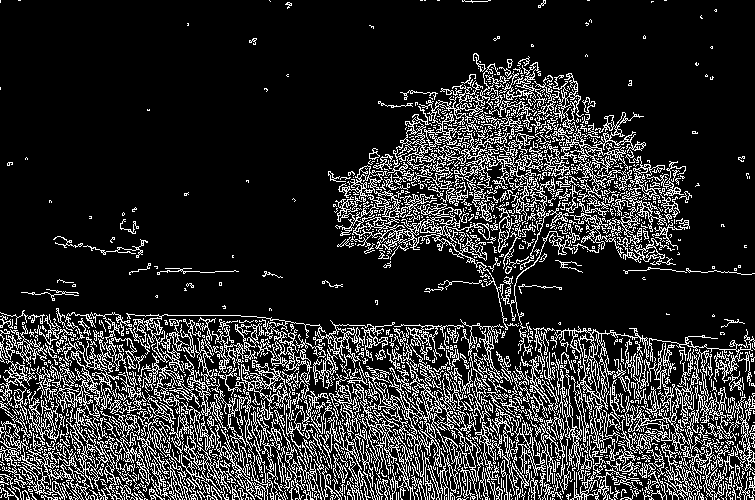

In [32]:
# 4.3 (5 pts) Add varying amounts of noise to an image and 
# show how edge detection degrades.
# Again explain what is happening in terms of the algorithm.

def add_shot_noise(image, shots):
    newImage = np.copy(image)
    for i in range(0, shots):
        x = np.random.randint(image.shape[0])
        y = np.random.randint(image.shape[1]) 
        newImage[x, y] = 255
    return newImage

def demo_multi_filters(img, fltr):
    if(fltr == "sobelx"):
        # sobel filter x 
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Will do edge detection in the x direction
    elif(fltr == "sobely"):
        # sobel filter y
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 0, 1) # will do edge detection in the y direction      
    elif(fltr == "laplacian"):
        # laplacian filter
        edgedetectedImage = cv2.Laplacian(img, cv2.CV_64F)
    else:       
        #canny filter
        edgedetectedImage = cv2.Canny(img,20,200) 
    return edgedetectedImage

def edgeDetector(image,fltr):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    imgdis = add_shot_noise(img,4000)
#     imgSmooth = cv2.GaussianBlur(imgdis,(5,5),0)
    edgedImage = demo_multi_filters(imgdis,fltr)
    Image.fromarray(edgedImage)
    return edgedImage

edgedImage = edgeDetector("edgePicBank/tree.jpg","canny")
Image.fromarray(edgedImage)

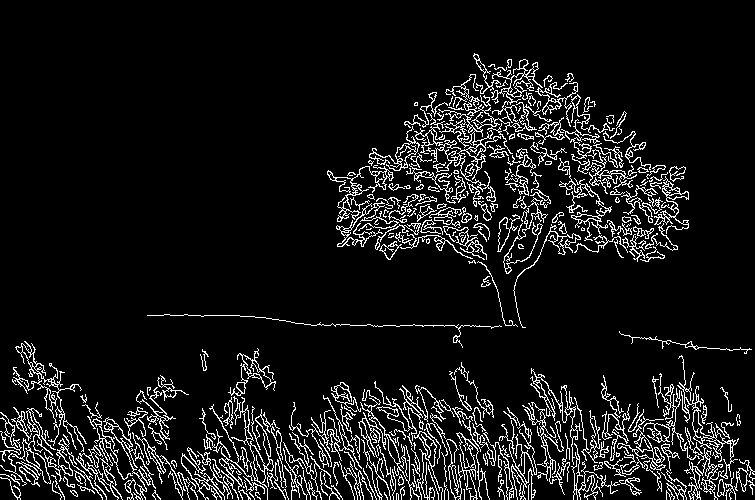

In [31]:
# 4.4 (5 pts) Now use these same noisy images but use smoothing to improve
# the edge detection and compare the results to the original noise-free image.

def add_shot_noise(image, shots):
    newImage = np.copy(image)
    for i in range(0, shots):
        x = np.random.randint(image.shape[0])
        y = np.random.randint(image.shape[1]) 
        newImage[x, y] = 255
    return newImage

def demo_multi_filters(img, fltr):
    if(fltr == "sobelx"):
        # sobel filter x 
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Will do edge detection in the x direction
    elif(fltr == "sobely"):
        # sobel filter y
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 0, 1) # will do edge detection in the y direction      
    elif(fltr == "laplacian"):
        # laplacian filter
        edgedetectedImage = cv2.Laplacian(img, cv2.CV_64F)
    else:       
        #canny filter
        edgedetectedImage = cv2.Canny(img,20,200) 
    return edgedetectedImage

def edgeDetector(image,fltr):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    imgdis = add_shot_noise(img,4000)
    imgSmooth = cv2.GaussianBlur(imgdis,(5,5),0)
    edgedImage = demo_multi_filters(imgSmooth,fltr)
    Image.fromarray(edgedImage)
    return edgedImage

edgedImage = edgeDetector("edgePicBank/tree.jpg","canny")
Image.fromarray(edgedImage)


# smoothening the short noise with a blur filter brought noise below the threshold, 
# therefore it was not detected as an edge anymore

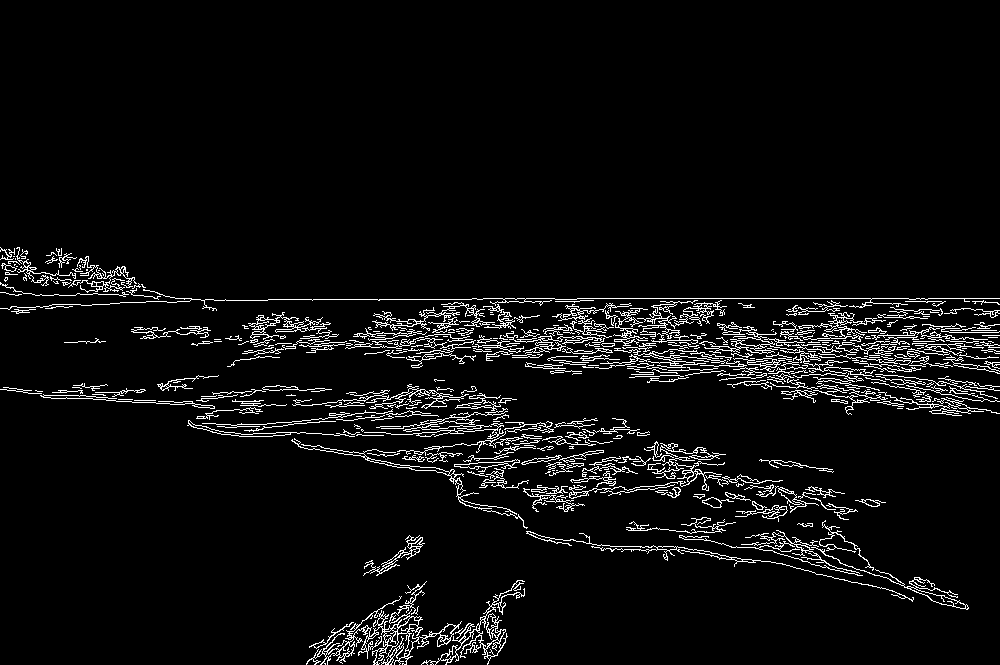

In [22]:
# 4.5 (5 pts) Select images to illustrate how an edge detection can detect 
# numerous types of boundaries that correspond to 
# distinct types of structure in the real world.
# edgePicBank/tree.jpg
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image 
import cv2

def add_shot_noise(image, shots):
    img = cv2.imread("edgePicBank/tree.jpg", cv2.IMREAD_GRAYSCALE)
    newImage = np.copy(img)
    for i in range(0, shots):
        x = np.random.randint(image.shape[0])
        y = np.random.randint(image.shape[1]) 
        newImage[x, y] = 255
    return newImage

def demo_multi_filters(img, fltr):
    if(fltr == "sobelx"):
        # sobel filter x 
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Will do edge detection in the x direction
    elif(fltr == "sobely"):
        # sobel filter y
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 0, 1) # will do edge detection in the y direction      
    elif(fltr == "laplacian"):
        # laplacian filter
        edgedetectedImage = cv2.Laplacian(img, cv2.CV_64F)
    else:       
        #canny filter
        edgedetectedImage = cv2.Canny(img,20,200) 
    return edgedetectedImage

def edgeDetector(image,fltr):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
#     imgdis = add_shot_noise(img,4000)
#     imgSmooth = cv2.GaussianBlur(imgdis,(5,5),0)
    edgedImage = demo_multi_filters(img,fltr)
    Image.fromarray(edgedImage)

    return edgedImage



edgedImage = edgeDetector("diffStruc/beach1.jpg","canny")
Image.fromarray(edgedImage)

# beach in the morning

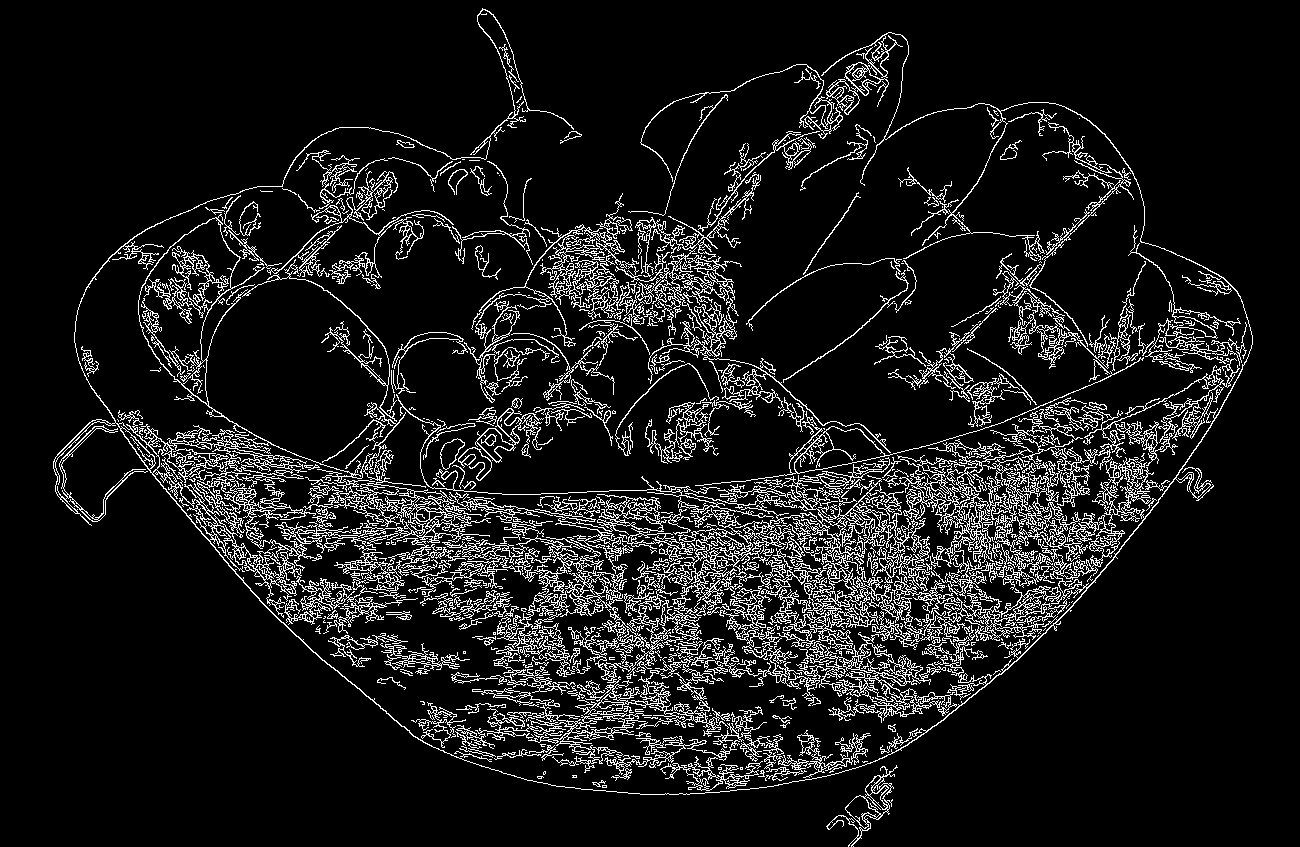

In [27]:
edgedImage = edgeDetector("diffStruc/fruit_bowl.jpg","canny")
Image.fromarray(edgedImage)

# boundaries not detected properly for a fruit bowl

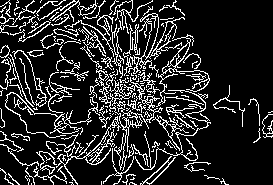

In [23]:
edgedImage = edgeDetector("diffStruc/flower.jpg","canny")
Image.fromarray(edgedImage)
#flower

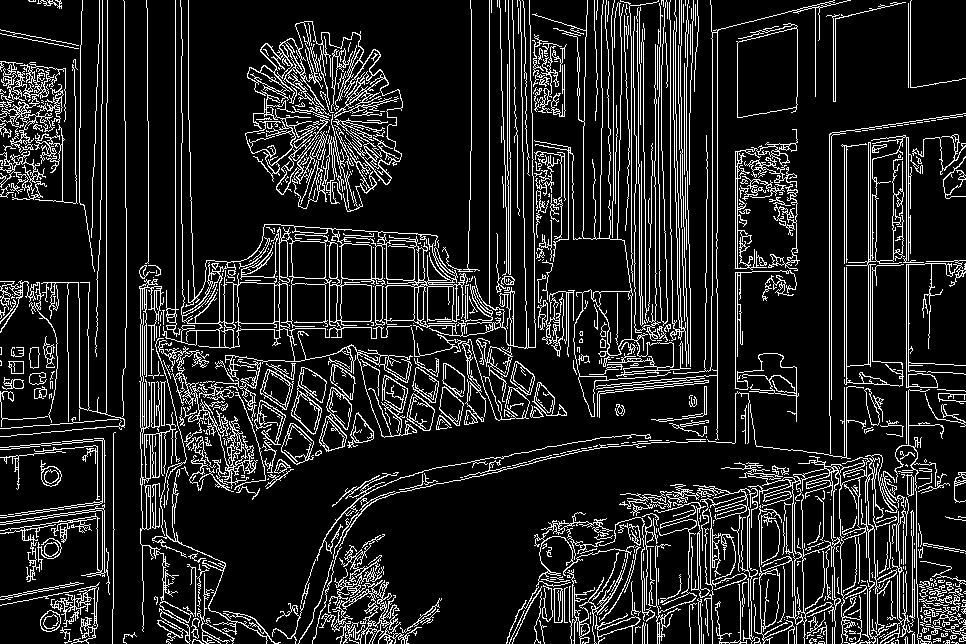

In [25]:
edgedImage = edgeDetector("diffStruc/bedroom.jpeg","canny")
Image.fromarray(edgedImage)
#bedroom

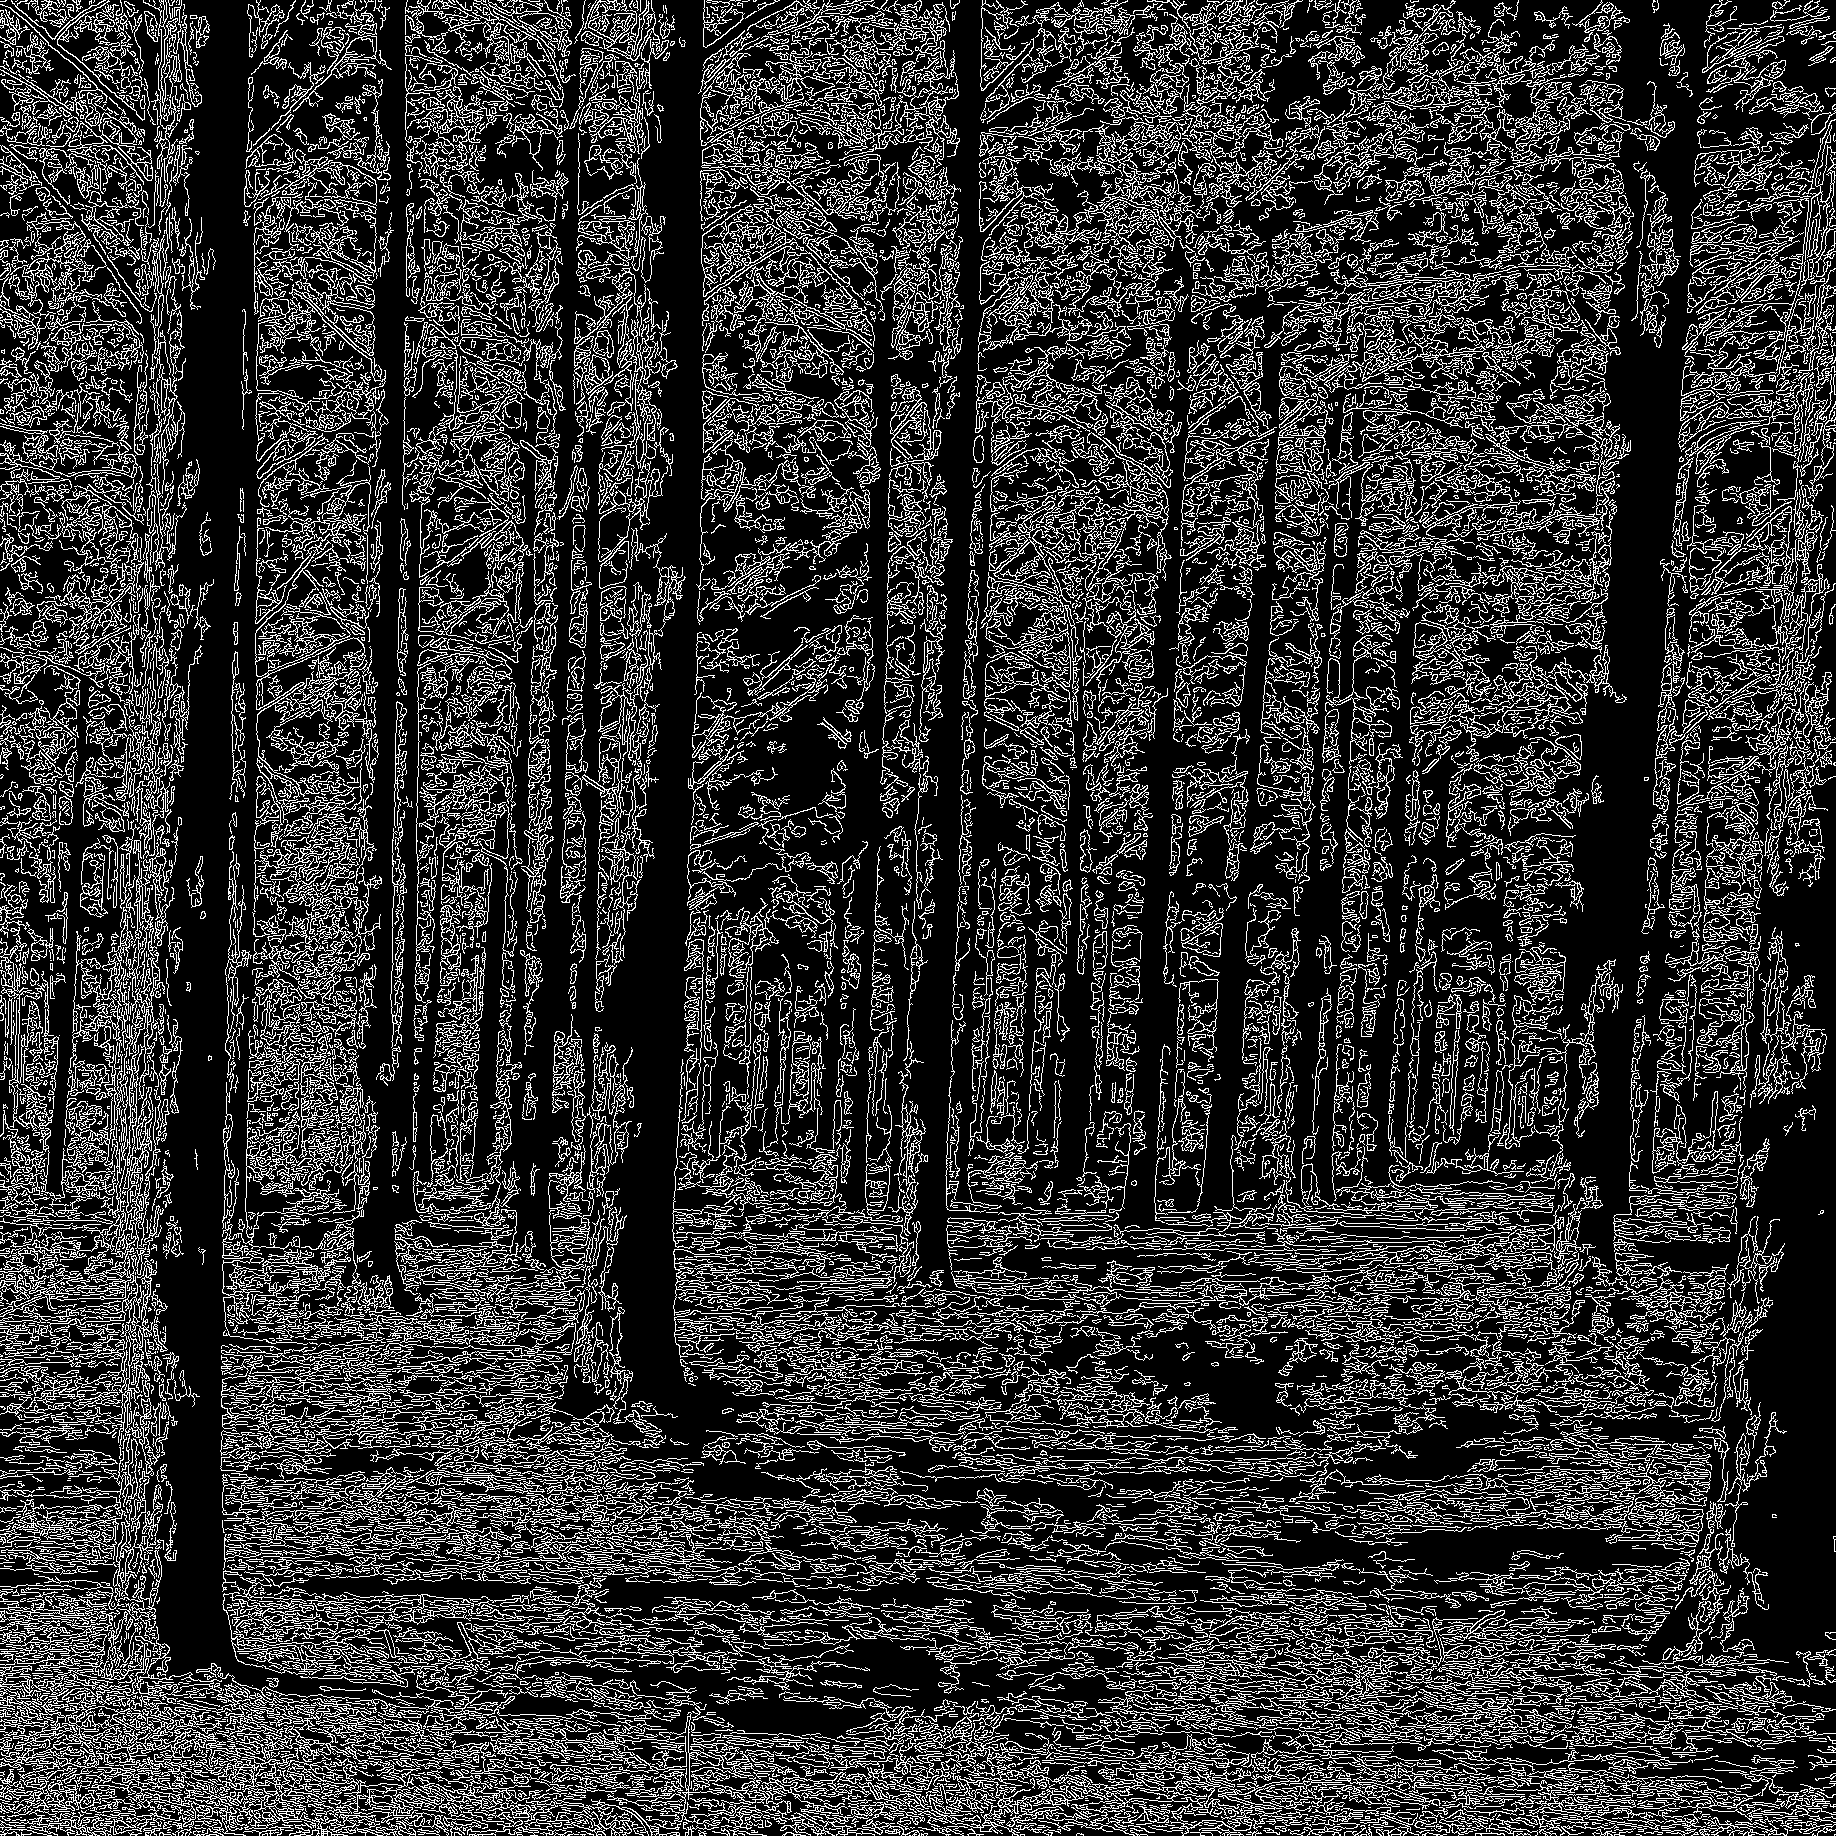

In [19]:
# 4.6 (5 pts) Now select images to illustrate different ways 
# in which edge detection can fail, in the sense that the boundary 
# is clear visible to us, but isn't detectable by the algorithm.

#Ans
# the algorithm in this image cannot detect edges where sunlight hits the tree trunk
# even though we know there is an edge, the algorithm cannot distinguish it as the intensity
# in those places has decreased
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image 
import cv2

def add_shot_noise(image, shots):
    img = cv2.imread("edgePicBank/tree.jpg", cv2.IMREAD_GRAYSCALE)
    newImage = np.copy(img)
    for i in range(0, shots):
        x = np.random.randint(image.shape[0])
        y = np.random.randint(image.shape[1]) 
        newImage[x, y] = 255
    return newImage

def demo_multi_filters(img, fltr):
    if(fltr == "sobelx"):
        # sobel filter x 
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Will do edge detection in the x direction
    elif(fltr == "sobely"):
        # sobel filter y
        edgedetectedImage = cv2.Sobel(img, cv2.CV_64F, 0, 1) # will do edge detection in the y direction      
    elif(fltr == "laplacian"):
        # laplacian filter
        edgedetectedImage = cv2.Laplacian(img, cv2.CV_64F)
    else:       
        #canny filter
        edgedetectedImage = cv2.Canny(img,20,200) 
    return edgedetectedImage

def edgeDetector(image,fltr):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
#     imgdis = add_shot_noise(img,4000)
#     imgSmooth = cv2.GaussianBlur(imgdis,(5,5),0)
    edgedImage = demo_multi_filters(img,fltr)
    Image.fromarray(edgedImage)

    return edgedImage

edgedImage = edgeDetector("diffStruc/forest1.jpg","canny")
Image.fromarray(edgedImage)

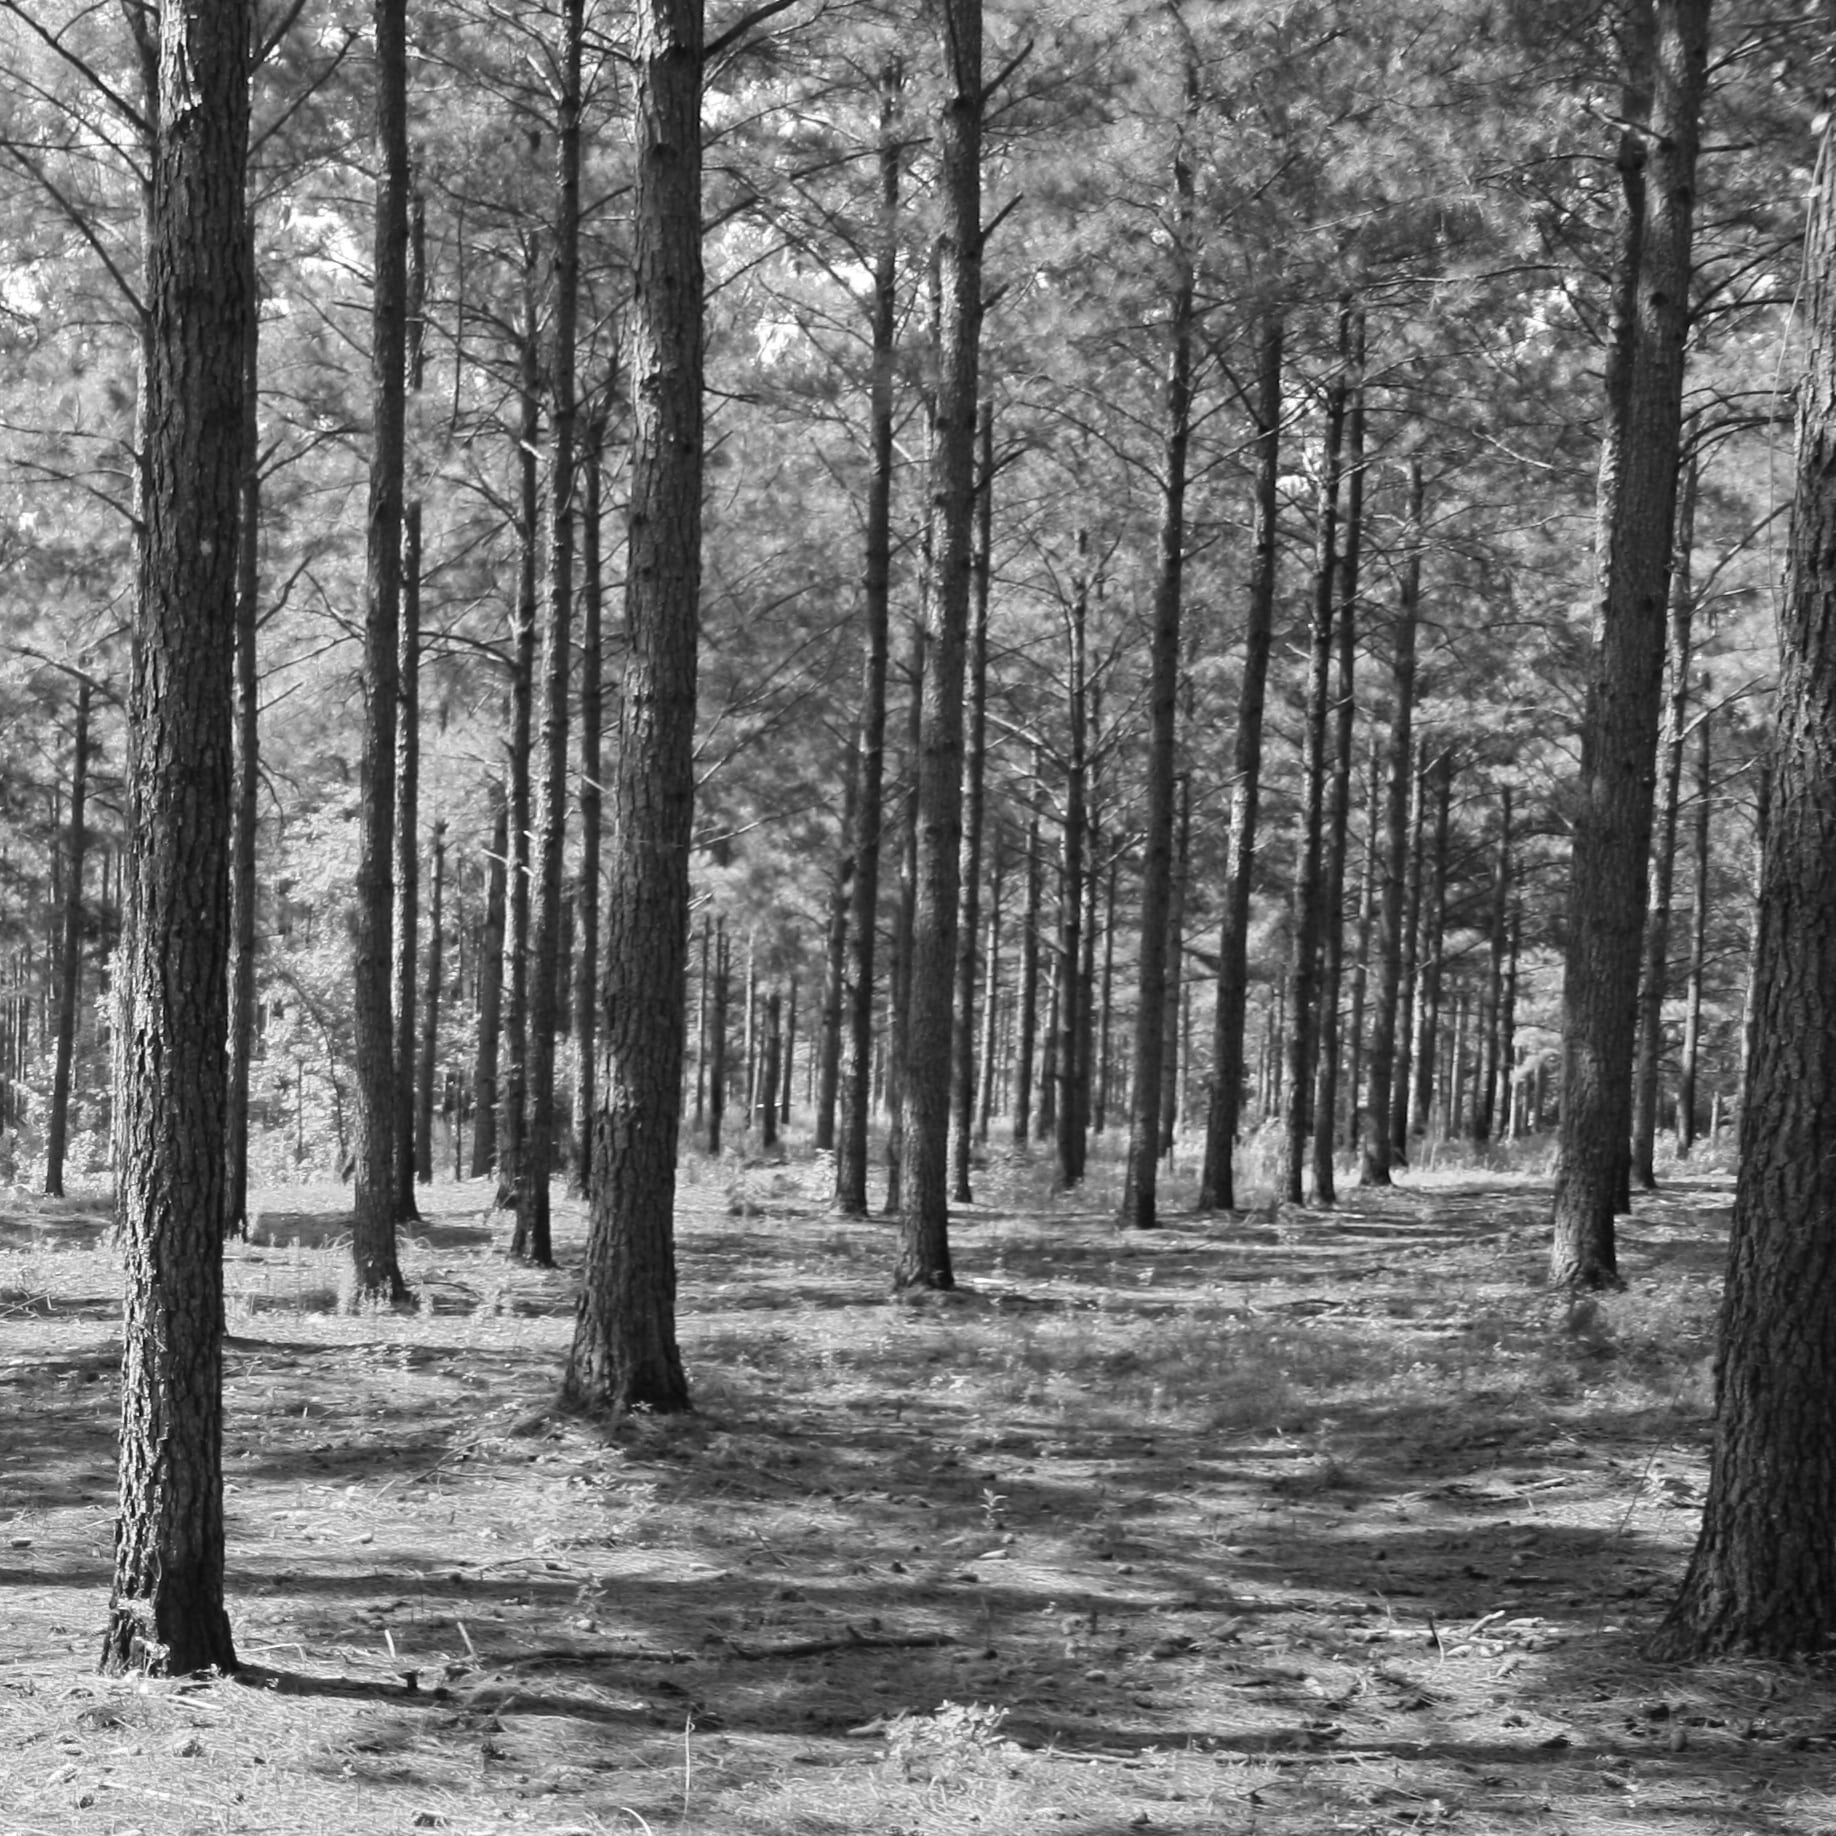

In [18]:
img = cv2.imread("diffStruc/forest1.jpg", cv2.IMREAD_GRAYSCALE)
Image.fromarray(img)

### Exploration (40 pts)

In these problems, you are meant to do creative exploration. This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project. 

Some other ideas:
- reproduce a figure from the readings
- derive or illustrate equations from the readings
- any of the exercises in Szeliski Ch. 3.

The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background.

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|   Element  | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. |
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|


In [ ]:
# In these problems, you are meant to do creative exploration. This is meant to be open-ended;
# you should not feel the need to write a book chapter;
# but neither should you just change the numbers in one of the problems above. 
# After doing the readings and problems above, 
# you should pick a concept you want to understand better or an simple modeling idea you want to try out.
# You can also start to explore ideas for your project.

# My exploration is doing all the above filters and edge detectors in alongside rgb colors

In [59]:
# 2.1 (5 pts) Write a function that implements linear filtering (i.e. equation 3.12 or 3.14 in Szeliski).
# Write a short "doc string" that explains your function and its arguments. 
# Also explain how you handled boundaries.



def linear_filter(gray, kernel):

# converting colored image to grayscale because we need a matrix of only 2 dimensions
#     img = cv2.imread('/home/img/python.png') 

#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     cv2.imshow("original", gray)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()



# determining the dimensions of image and kernel
    (iH, iW) = gray.shape[:2]
    (kH, kW) = kernel.shape[:2]

#bordering the original image by repeating the border edges on all sides
    pad = (kW - 1) // 2 # pad = 1
    gray = cv2.copyMakeBorder(gray, pad, pad, pad, pad,
                           cv2.BORDER_REPLICATE)
# creating an output image with the same dimensions as input image
    output = np.zeros((iH, iW), dtype="float32")

# looping through the height dimension after the top padding to the bottom padding edge
    for y in np.arange(pad, iH + pad):
    # looping through the width dimension after the left padding to the right padding edge
        for x in np.arange(pad, iW + pad):
        # locating the region of interest where actual convolution needs to be done
            roi = gray[y - pad:y + pad + 1, x - pad:x + pad + 1]
        # convolution
            k = (roi * kernel).sum()
        # appending to output
            output[y - pad, x - pad] = k


    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")


    # print(kernel)
    return output
#     cv2.imshow("output", output)
#     cv2.imwrite("C:/MyImage.jpg", output);
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()



def linear_filter_rgb(image, kernel):
    """Does the same as lienar_filter but for rgb image"""
#     print(image.shape)
#     print(image[:,:,0].shape)
    effective_shape = np.array(image[:,:,0].shape) - np.array(kernel.shape) + 1;
#     print(effective_shape)
#     print(image.shape[-1])
    newImage = np.zeros((image.shape[-1], effective_shape[0], effective_shape[1]))
#     newImage = np.zeros((image.shape[-1], 2, 2))

    print(newImage.shape)
    print(image.shape, effective_shape[0], effective_shape[1])
    for i in range(0, newImage.shape[0]):
        newImage[i] = linear_filter1(image[:,:,i], kernel)
    return np.moveaxis(newImage, 0, -1)

(3, 663, 998)
(665, 1000, 3) 663 998


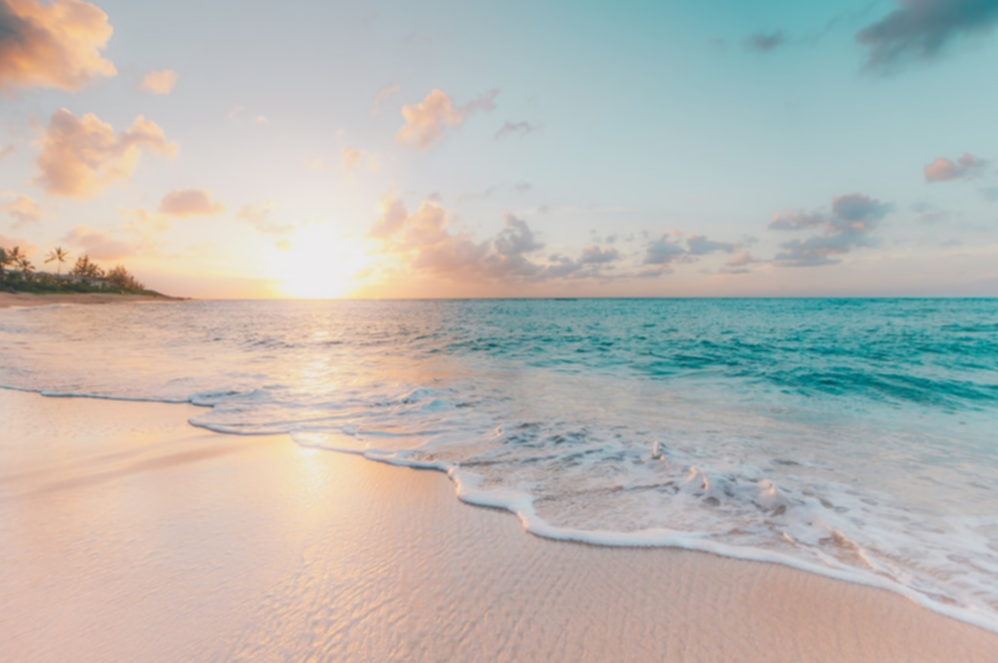

In [60]:
img = Image.open('diffStruc/beach1.jpg')
blur = np.array([
    [0.1, 0.1, 0.1],
    [0.1, 0.2, 0.1],
    [0.1, 0.1, 0.1]
])
new_img = linear_filter_rgb(np.array(img), blur)
Image.fromarray(np.uint8(new_img))